In [80]:
import os
import cv2  # For image processing
import numpy as np
from sklearn import svm
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [81]:
# Define image size
size = (128, 128)

# Paths for stop sign and non-stop sign images
path_stop = r"D:\Downloads\STUDYmaterials\445\445 Project\Images"
path_non_stop = r"D:\Downloads\STUDYmaterials\445\445 Project\Images"

# Lists to store images and labels
images = []
labels = []

# Process stop sign images (label 1)
for file_name in os.listdir(path_stop):
    if file_name.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(path_stop, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, size)  # Resize to defined size
        images.append(img)
        labels.append(1)  # Label for stop signs

# Process non-stop sign images (label 0)
for file_name in os.listdir(path_non_stop):
    if file_name.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(path_non_stop, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, size)  # Resize to defined size
        images.append(img)
        labels.append(0)  # Label for non-stop signs

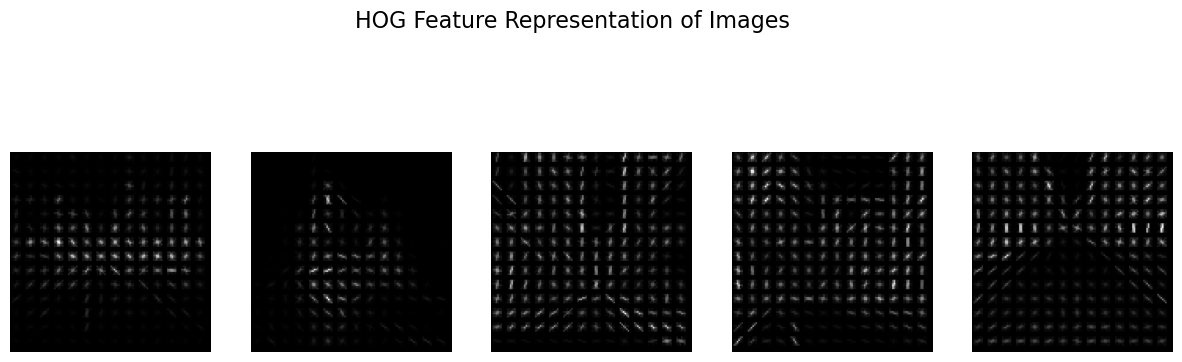

In [82]:
# Extract HOG features from ALL images
hog_features = []
for image in images:
    features, _ = hog(image, pixels_per_cell=(9, 9), cells_per_block=(2, 2), 
                      orientations=10, block_norm='L2-Hys', visualize=True)
    hog_features.append(features)
    
X = np.array(hog_features)
y = np.array(labels)

# Extract and display HOG features for the first 5 images
fig, axs = plt.subplots(1, 5, figsize=(15, 5))  # Creating subplots
hog_features = []

for i in range(5):
    # Extract HOG features and visualize
    features, hog_image = hog(images[i], pixels_per_cell=(9, 9), cells_per_block=(2, 2), 
                              orientations=10, block_norm='L2-Hys', visualize=True)
    hog_features.append(features)  # Store the HOG features
    
    # Display HOG image
    axs[i].imshow(hog_image, cmap='gray')
    axs[i].axis('off')  # Hide axes

plt.suptitle("HOG Feature Representation of Images", fontsize=16)
plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [85]:
# Predict on the test set
y_pred = knn_model.predict(X_test)

In [86]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
report_knn = classification_report(y_test, y_pred)

In [87]:
print("KNN Model Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

KNN Model Accuracy: 0.175
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.05      0.06        21
           1       0.23      0.32      0.27        19

    accuracy                           0.17        40
   macro avg       0.15      0.18      0.16        40
weighted avg       0.15      0.17      0.16        40



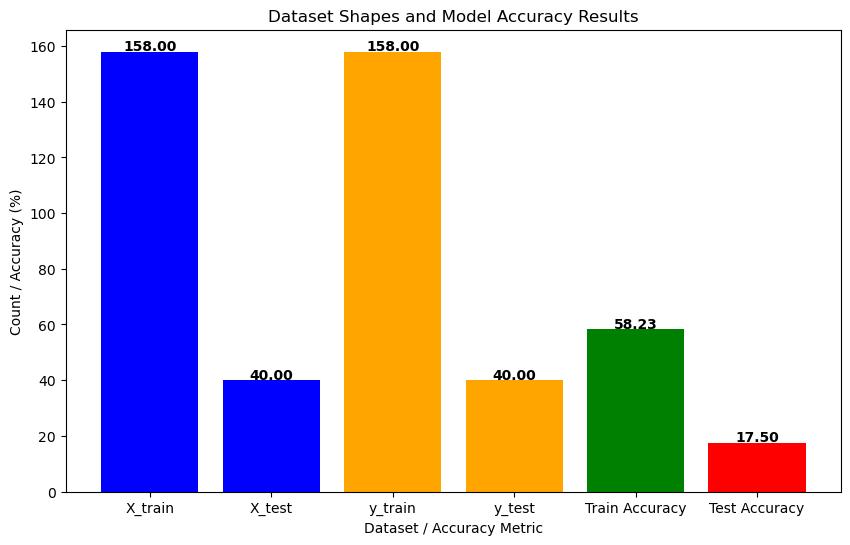

In [88]:
# Display the shapes of the datasets
X_train_shape = X_train.shape[0]
X_test_shape = X_test.shape[0]
y_train_shape = y_train.shape[0]
y_test_shape = y_test.shape[0]

# Calculate training and testing accuracies
train_accuracy = knn_model.score(X_train, y_train)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_pred)  # Testing accuracy

# Plotting the information in a bar chart
labels = ['X_train', 'X_test', 'y_train', 'y_test', 'Train Accuracy', 'Test Accuracy']
values = [X_train_shape, X_test_shape, y_train_shape, y_test_shape, train_accuracy * 100, test_accuracy * 100]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'blue', 'orange', 'orange', 'green', 'red'])
plt.xlabel("Dataset / Accuracy Metric")
plt.ylabel("Count / Accuracy (%)")
plt.title("Dataset Shapes and Model Accuracy Results")

# Adding data labels on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()